
# Project-2: Investigate the Medical Appointment No Shows Dataset
### Author: Lubna Alhenaki
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project I have investigated a dataset of containing aproximately 100k medial appointment records from the Brazilian public health system known as SUS (Single Health System). I downloaded the No Show Appointments dataset and saved it as 'noshowappointments.csv'. In this project, the analysis is focused on finding trends influencing patients to check if the patients to show or not show up to appointments.

The original problem description and data set can be found [here](https://www.kaggle.com/joniarroba/noshowappointments/home)


In this analyzing, the following questions will be answered: 


1) Does age (younger or older) have any impact or relationship with the status of show / No show for the appointments?

2) Does the combination of age and gender have impact or relationship with the status of show / No show for the appointments?

In [228]:
#import needed packages for reading and manipulating CSV File, Basic EDA and Visualization 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




<a id='wrangling'></a>
## Data Wrangling

In this section, the dataset will be loaded , explored and cleaned


### General Properties

In the following code, I'm tring to explore and assessing the dataset in depth to understand and find the answer for:

1. How many samples in the dataset?
2. How many columns in the dataset?
3. What kind (datatypes) of variables?
4. Is there any need for data engineering? like convert the data type or create more columns with usefull data?
5. Is there any duplicates?
6. Is there any missing value?
7. Is there any duplicate rows in the dataset
8. How many number of non-null unique values for features in the dataset?
9. What those unique values are and counts for each?



In [229]:
# Load and read no show appointments data and print out a few lines 

appointment_df= pd.read_csv('/Users/lubnaalhenaki/Downloads/noshowappointments.csv')

#print few lines to explor the data

appointment_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To inspect data types and look for instances of missing or possibly errant data. The describe function helps to get an overview of the data from a statistical summary viewpoint. This is also useful for spotting any potential errors that might need a closer look.

In [230]:
# Create the summary report ( Find any anomalies in the data)
appointment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The following code answer the question of:
1. How many samples in the dataset?
2. How many columns in the dataset?

In [231]:
appointment_df.shape #There are 110527 records and 14 columns in the dataset.

(110527, 14)

#### Assessing Data

The following code answer the question written in general properties from three until end

In [232]:
appointment_df.info() #structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [233]:
appointment_df.isnull().sum() #There is no missing values in the above dataset

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [234]:
appointment_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [235]:
appointment_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [236]:
# checking all possible values on each columns
print(appointment_df.Gender.unique())
print(sorted(appointment_df.Age.unique()))
print(sorted(appointment_df.Neighbourhood.unique()))
print(appointment_df.Scholarship.unique())
print(appointment_df.Hipertension.unique())
print(appointment_df.Diabetes.unique())
print(appointment_df.Alcoholism.unique())
print(appointment_df.Handcap.unique())
print(appointment_df.SMS_received.unique())
print(appointment_df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

##### The following table shows the description and type of each variable to understand the purpose them:

| Name      | Description | Type     |
| :---        |    :----:   |          ---: |
| PatientId       | Identification of a patient      | float64  |
| AppointmentID    | Identification of each appointment        | int64     |
| Gender    | Male or Female        | 	string(F or M)      |
| ScheduledDay    | 	Tells us on what day the patient set up their appointment        | string      |
| AppointmentDay   | The day of the actuall appointment, when they have to visit the doctor       | string      |
| Age   | 	how old is the patient        |int64     |
| Neighbourhood   | Where the appointment takes place        |string      |
| Scholarship   | indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família        | int64(0 or 1)      |
| Hipertension   | indicates if the patient has hipertension        | int64(0 or 1)      |
| Diabetes   | indicates if the patient has diabetes        | int64(0 or 1)     |
| Alcoholism   | indicates if the patient is an alcoholic        | int64(0 or 1)      |
| Handcap   | 	indicates if the patient is handicaped        | int64(0,1,2,3 and 4)      |
| SMS_received   | 1 or more messages sent to the patient       | int64(0 or 1)     |
| No-show   | "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up        | string(Yes or No)      |


**Predictor variables (Independent Variable)**

- Gender
- ScheduledDay
- AppointmentDay
- Age
- Neighbourhood
- Scholarship
- Hipertension
- Diabetes
- Alcoholism
- Handcap
- SMS_received

**Target variable ( Dependent Variable)**

- No-show

In [237]:
sum(appointment_df.duplicated()) #there is no duplicate rows in the dataset

0

In [238]:
appointment_df['No-show'].value_counts() #this dataset is unbalanced

No     88208
Yes    22319
Name: No-show, dtype: int64


**Here are some initial observations:**
1. There are 13 independent variables and one dependent (no_show) in the dataset.
2. The dataset does not contain any missing values (NaNs).
3. The scheduled_day and appointment_day columns type should be changed to datetime.
4. The dataset is unbalanced
5. The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.


### Data Cleaning Process

In this section, I'm going to solve the problems finds in the dataset from the above observations:


1. The min age is -1.Clearly people can't have an age of -1 as that would be pre-birth and at birth you are essentially 0 years old.

2. Drop 'PatientId' and 'AppointmentID' from the dataframe as they are just some system genrated numbers and shouldn't be used for predicting the dependent variable, also to improve database redability.

3. Rename the columns to use easier names during the exploration while fixing typos like (No-show)
4. Change handicap value to binary (0 and 1), since we only want to know if the patient is handicap and not how many disabilities they have. 
5. The scheduled_day and appointment_day columns type should be changed to datetime.
6. As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore and remove it.


In [239]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

appointment_df.query('Age == -1') ## show all recordes that meet the condiction
appointment_df.loc[appointment_df.Age == -1,'Age'] = 0 #reassign value to zero 
print("Unique Values in `Age` => {}".format(np.sort(appointment_df.Age.unique()))) # to ensure the value change correctly 

Unique Values in `Age` => [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [240]:
#Drop 'PatientId' and 'AppointmentID' from appointment dataframe 
appointment_df.drop(columns=['AppointmentID','PatientId'],axis=1,inplace=True)

In [241]:
#Quick sure of removing columns (before is 14 and now is 12)
appointment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [242]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
appointment_df.rename(columns={'No-show': 'noshow','Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)
appointment_df.rename(columns= lambda x: x.lower(), inplace= True)
appointment_df.head(2)



,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [243]:
# remove the level values from handcap variable
appointment_df.handicap=appointment_df.handicap.map({0:0,1:1,2:1,3:1,4:1})
appointment_df.handicap.unique() #to ensure we only get binary value

array([0, 1])

In [244]:
# Convert columns types
appointment_df['scheduledday'] = pd.to_datetime(appointment_df['scheduledday']).dt.date.astype('datetime64[ns]')
appointment_df['appointmentday'] = pd.to_datetime(appointment_df['appointmentday']).dt.date.astype('datetime64[ns]')

# Check if the type is now datetime
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
noshow            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [245]:
print('Unique Values in Scheduled Day are: '.format(np.sort(appointment_df.scheduledday.dt.strftime('%Y-%m-%d').unique())))

Unique Values in Scheduled Day are: 


We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's around 7 months of data.

In [246]:
# Print Unique Values for 'AppointmentDay'
print("Unique Values in Appointment Day are: {}".format(np.sort(appointment_df.appointmentday.dt.strftime('%Y-%m-%d').unique())))

Unique Values in Appointment Day are: ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


From the above detail we can see that AppointmentDay ranges from 2016-04-29 to 2016-06-08. The AppointmentDay spans just above 1 Month in contrast to the ScheduledDay that spans around 7 Months.

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the dataset, in this section, we used visualization to answer questions and understand data in depth



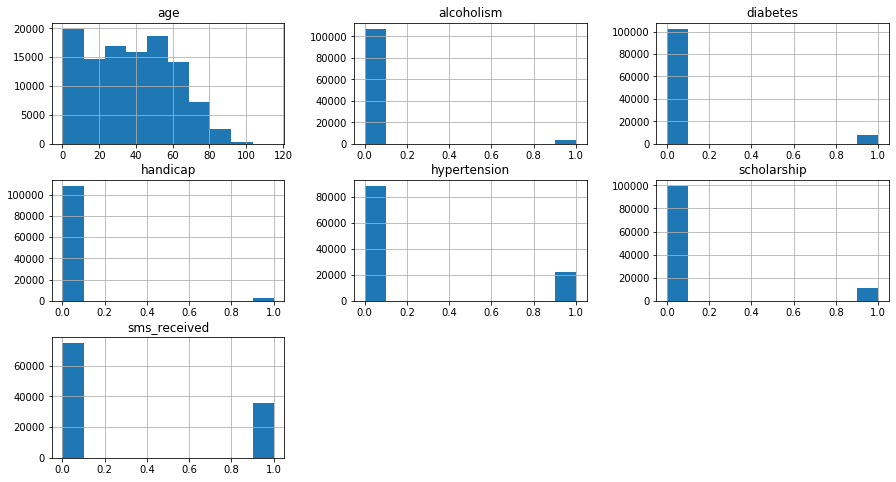

In [247]:
# and plot basic histogram charts
appointment_df.hist(figsize=(15, 8));


Histogram observations
- Age: There are many very young people in the dataset but in general we can see that there are peaks for the Infants and then the distribution starts to be uniform and the number of patients goes drastricly down for patients older than 60 years we can see a right-skewed distribution..
- Alcoholism: Most of the patients are not alcoholics.
- Diabetes: Most of the patients are not diabetes but more than alcoholics.
- Handicap: There are for handicap categories with most of the people not being handicapted.
- Sms_Recieved: Most patients recieved a message 
- Hypertension: Most patients do not have hypertension diagnosed.

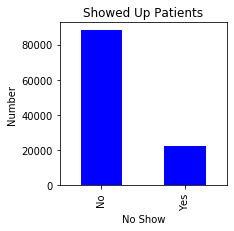

In [249]:
appointment_df['noshow'].value_counts().plot.bar(figsize = (3,3), title = 'Showed Up Patients', color = 'b')
plt.xlabel('No Show')
plt.ylabel('Number');



From the above information we can see that there is clearly a class imbalance. Out of 110500 patients around 88000 (80% ) of the patients are coming for the visit after an appointment and around 20000 (20%) are skipping their appointments.

**Reminder** ‘No’ meaning  if the patient showed up to their appointment, and ‘Yes’ if they did not show up

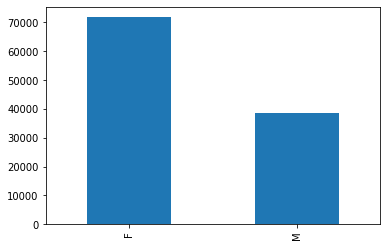

In [227]:
appointment_df.Gender.value_counts().plot(kind='bar') 
#show number of female and male, we can observed that female is double male

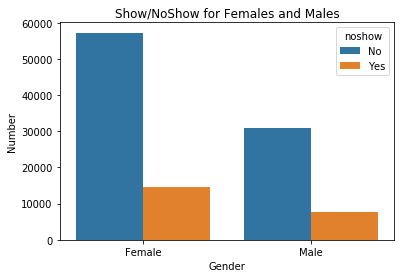

In [250]:
ax = sns.countplot(x=appointment_df.gender, hue=appointment_df.noshow, data=appointment_df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('Gender')
plt.ylabel('Number');
plt.show()

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not.

### Research Question 1 : Does age have any impact or relationship with the status of show / No show for the appointments?


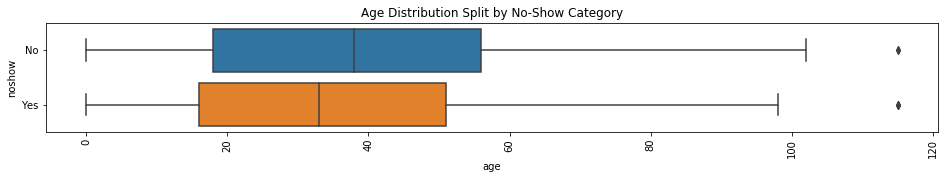

In [251]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
age = sns.boxplot(x=appointment_df.age,y=appointment_df.noshow).set_title('Age Distribution Split by No-Show Category')


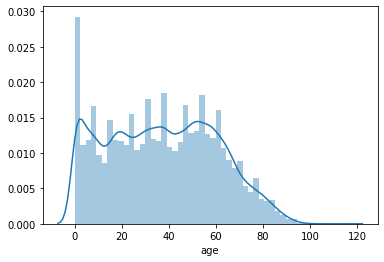

In [252]:
sns.distplot(appointment_df['age'])
plt.show()

From the above boxplot we can see that the Median Age is around 30 and the IQR is between 18 and 55. Also, we can see the people who did not show up for their appointments were younger. On the other hand, the patients who have showed up for appointment, it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20.


As we explained before, this dataset is unbalanced so in my opinion I think if each group had closer or same numbers that the "Yes" and "No" visuals would be more similar. Further analysis could be done to equalize the "Yes" and "No" group numbers and then re-make the boxplot. Lastly, the reason this visual was chosen was because it shows statistical 'outline' of the two groups.

### Research Question 2 : Does the combination of age and gender have impact or relationship with the status of show / No show for the appointments?

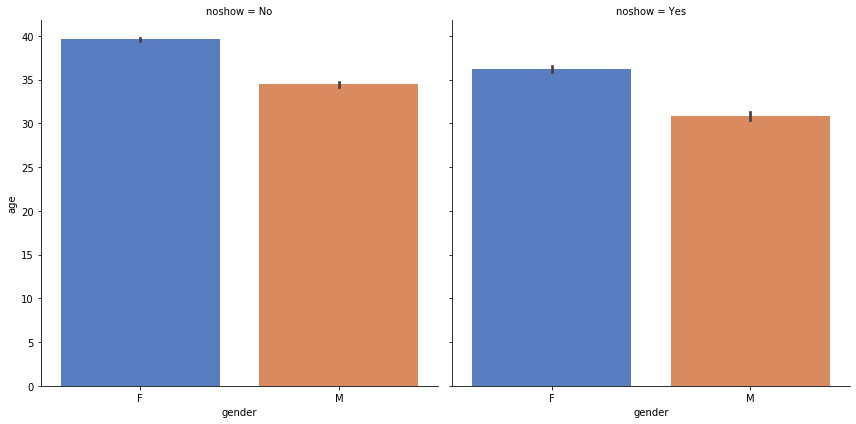

In [253]:
sns.catplot(x="gender", y="age", col="noshow", data=appointment_df, height=6, kind="bar", palette="muted", )


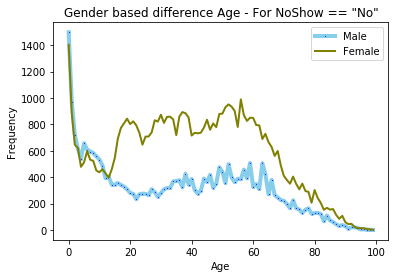

In [254]:
# Analysing the distribution among genders with their age whose status for NoShow is "No"
# i.e, they are coming for the appointment.
df = pd.DataFrame()
df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = df.Age.apply(lambda x:len(appointment_df[(appointment_df.age == x) & (appointment_df.gender == 'M') & (appointment_df.noshow == 'No')]))
Female = df.Age.apply(lambda x:len(appointment_df[(appointment_df.age == x) & (appointment_df.gender == 'F') & (appointment_df.noshow == 'No')]))

# multiple line plot
plt.plot( df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference Age - For NoShow == "No"');

We can observed from the above plot Female patients with Age group from 20 to 40 are NOT active in getting appointment with doctors when compared to similar age group of Males

<a id='conclusions'></a>
## Conclusions


This analysis had as purpose to perform an analysis of a database of medical consultations, containing more than 100k appointments which approximately 30% of the patients have not attended.

The notebook had the purpose of gather some insights on the possible causes of this missing appointments.

The most important interesting insights analysing:

- Most of the patients are not alcoholics.
- Scheduling visits started on 2015-11-10 and ended on 2016-06-08.
- There are many very young people in the dataset (most of them of age 0)and number of patients goes drastricly down for patients older than 60 years.
- The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
- Visit appointments started on 2016-04-29 and ended on 2016-06-08.
- Most of the patients are not diabetes but more than alcoholics.
- There are for handicap categories with most of the people not being handicapted.
- Most patients do not have hypertension diagnosed.
- For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.
- We have a large amount of female patients, assuming the context that women tend to care more about their health than man due to the massive difference from the consultants as we can see here.


Limitations
- If we know the work statues of patient this will be helpfull in analysis

- The data contained only around seven months data - If there are complete full year data on monthly basis, we can actually identify the traffic months appointments

- If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.

- If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are having more visits compared to other age groups.


## References

- Wikipedia - Sistema Único de Saúde (SUS). https://en.wikipedia.org/wiki/Sistema_%C3%9Anico_de_Sa%C3%BAde. Accessed in April, 2018.
- https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb
- https://www.kaggle.com/kuroski/data-analyst-nanodegree-project-first-attempt
- https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html
- https://www.kaggle.com/tigerli1997/fundamental-data-analysis